In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../Data/final_dataset_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2,3,5.0,West,Under Construction,1245.0,NaN,NaN,0,0,0,0,0,0,0,50
1,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4,5,3+,22.0,West,Relatively New,2905.0,NaN,2495.0,0,0,0,0,0,0,2,174
2,flat,m3m capital,sector 113,2.00,12012.0,1665.0,Super Built up area 1665(154.68 sq.m.),3,3,2,24.0,NaN,Under Construction,1665.0,NaN,NaN,0,0,0,0,0,0,0,47
3,flat,sare crescent parc,sector 92,0.87,4971.0,1750.0,Super Built up area 1750(162.58 sq.m.),4,4,2,2.0,East,Moderately Old,1750.0,NaN,NaN,0,0,0,0,0,4,1,115
4,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3+,5.0,North-East,Relatively New,2690.0,2350.0,2170.0,0,0,0,0,0,0,0,174


In [5]:
df.shape

(3677, 24)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'Wardrobe', 'furnishing_type', 'luxury_score'],
      dtype='object')

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='price', ylabel='Density'>

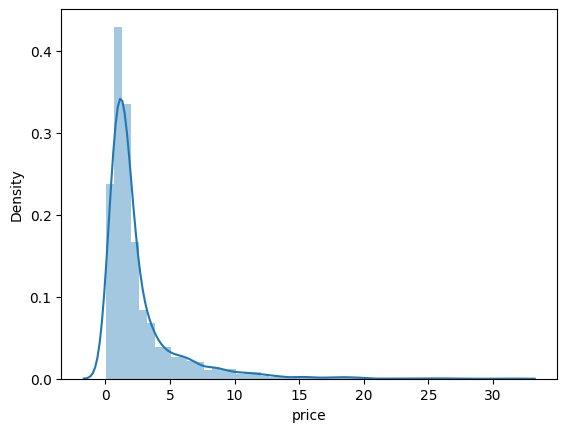

In [7]:
# outliers on the basis of price column
sns.distplot(df['price'])

<AxesSubplot:xlabel='price'>

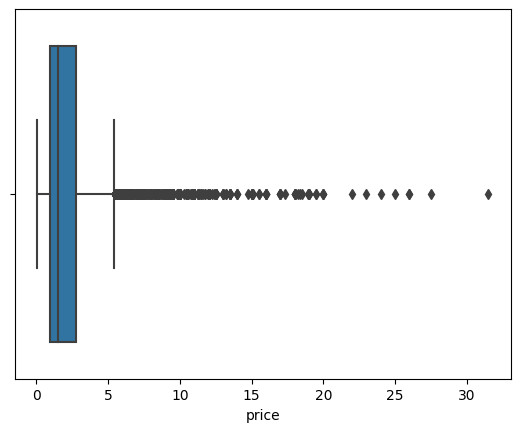

In [8]:
sns.boxplot(x=df['price'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
3796,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,0,0,0,0,0,9,1,74
1607,house,NaN,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,0,0,0,0,0,10,2,42
1143,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,0,0,0,0,0,10,2,138
168,house,NaN,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,0,0,0,0,0,26,1,72
2223,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0,0
2807,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,0,0,0,0,0,0,2,122
2301,house,NaN,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,0,0,0,0,0,5,2,145
639,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,5,0,54
353,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,0,0,0,0,16,2,31
2590,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,0,0,0,0,0,0,2,153


In [11]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

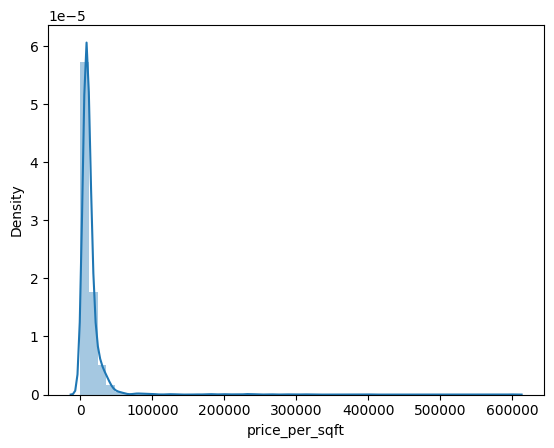

In [12]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

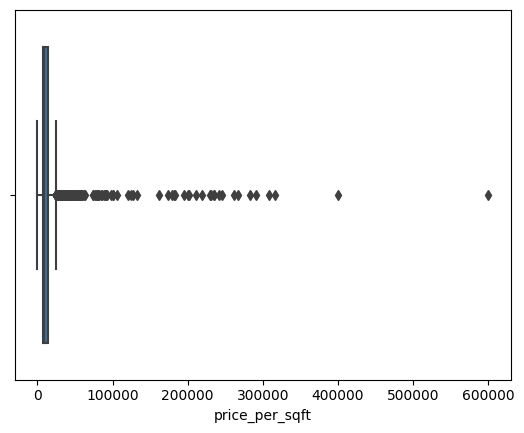

In [13]:
sns.boxplot(x=df['price_per_sqft'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [18]:
df.update(outliers_sqft)

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

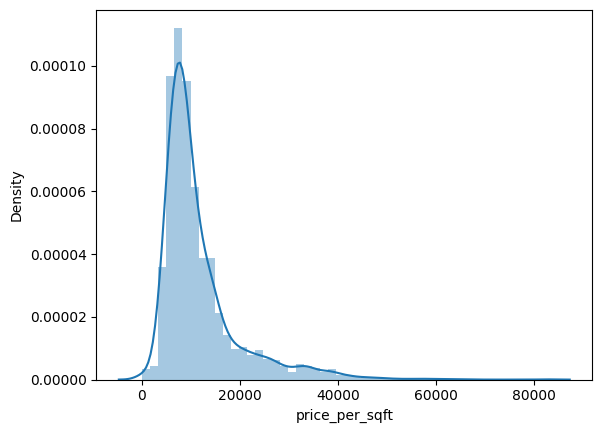

In [19]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

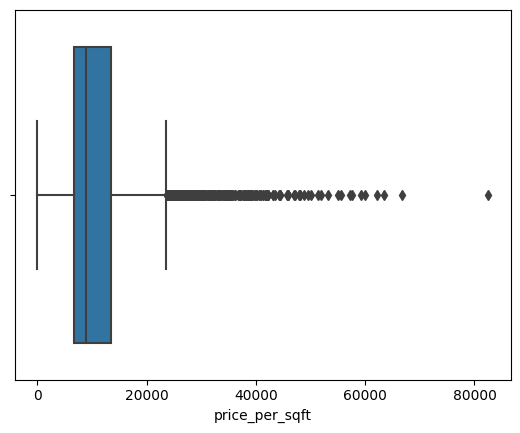

In [20]:
sns.boxplot(x=df['price_per_sqft'])

In [21]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
168,house,NaN,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,0.0,0.0,0.0,0.0,0.0,26.0,1.0,72.0
735,house,NaN,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,153.0
902,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,0.0,0.0,0.0,0.0,0.0,20.0,1.0,75.0
1143,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,0.0,0.0,0.0,0.0,0.0,10.0,2.0,138.0
1534,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2440,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,12.0,2.0,99.0
2807,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,122.0
2861,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2986,house,NaN,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,0.0,0.0,0.0,0.0,0.0,24.0,1.0,72.0


In [22]:
df = df[df['price_per_sqft'] <= 50000]

<AxesSubplot:xlabel='price_per_sqft'>

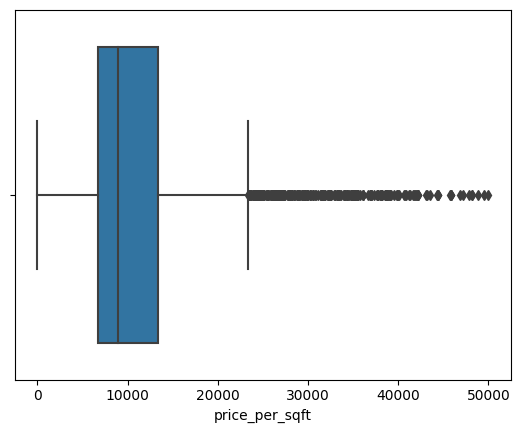

In [23]:
sns.boxplot(x=df['price_per_sqft'])

### Area

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='area', ylabel='Density'>

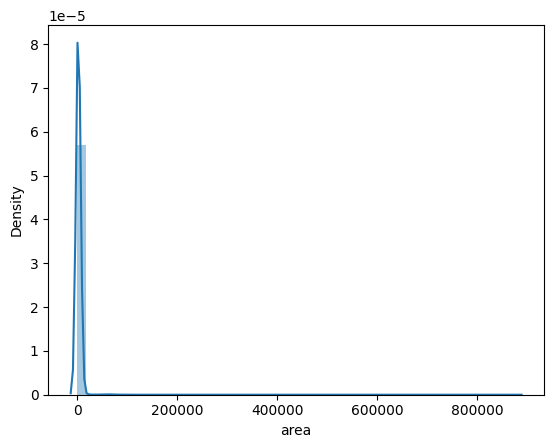

In [24]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

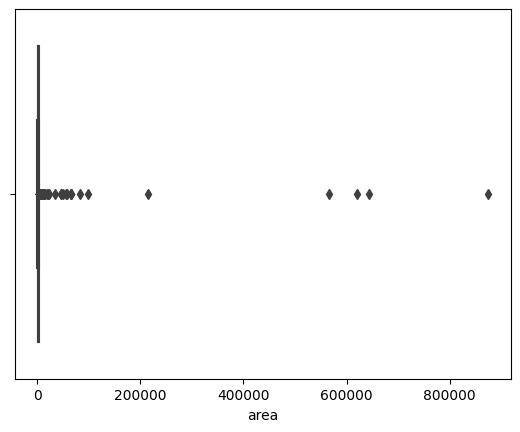

In [25]:
sns.boxplot(x=df['area'])

In [26]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [27]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
367,house,NaN,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
522,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,44.0
2505,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
2909,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0
3283,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0


In [28]:
df = df[df['area'] < 100000]

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='area', ylabel='Density'>

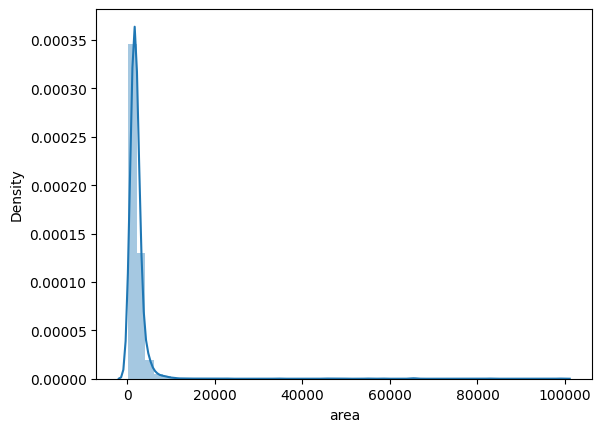

In [29]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

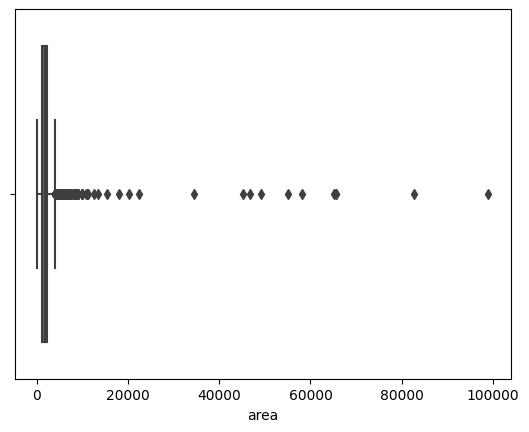

In [30]:
sns.boxplot(x=df['area'])

In [31]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
1382,house,NaN,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,0.0,0.0,0.0,0.0,6.0,2.0,60.0
1927,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0
2282,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2035,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
435,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
151,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1453,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
11,house,NaN,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,109.0
1219,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0


In [32]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [33]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
1382,house,NaN,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,0.0,0.0,0.0,0.0,6.0,2.0,60.0
1927,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0
2282,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2035,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
435,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
151,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1453,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
11,house,NaN,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,109.0
1219,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0


In [34]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='area', ylabel='Density'>

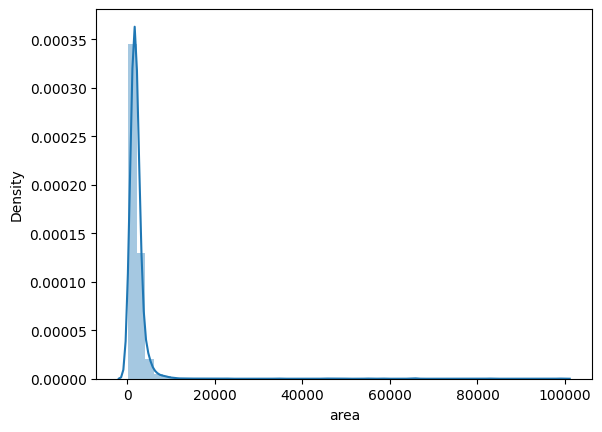

In [35]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

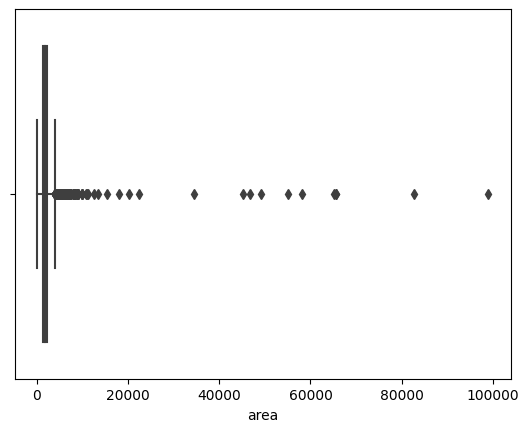

In [36]:
sns.boxplot(x=df['area'])

In [37]:
df['area'].describe()

count     3633.000000
mean      2154.319020
std       3629.386348
min        145.000000
25%       1262.000000
50%       1750.000000
75%       2350.000000
max      98978.000000
Name: area, dtype: float64

### Bedroom

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

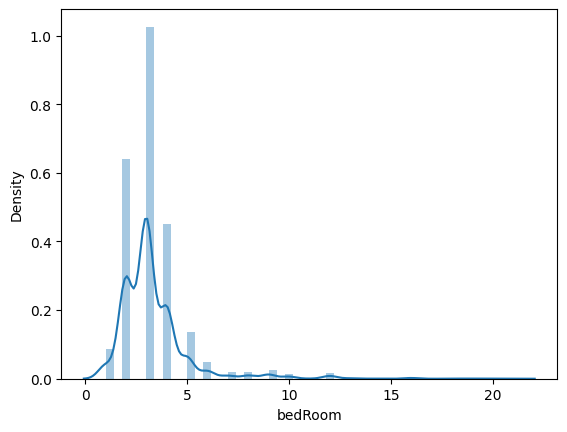

In [38]:
sns.distplot(df['bedRoom'])

<AxesSubplot:xlabel='bedRoom'>

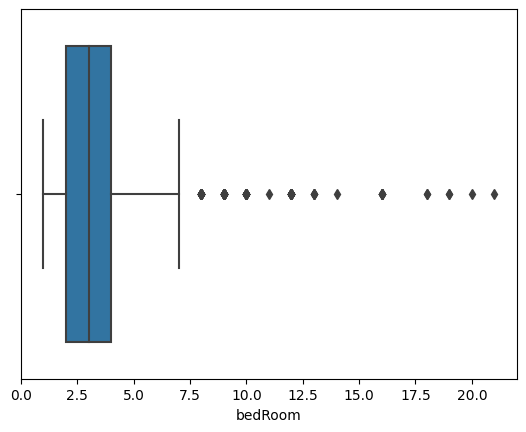

In [39]:
sns.boxplot(x=df['bedRoom'])

In [40]:
df['bedRoom'].describe()

count    3633.000000
mean        3.330306
std         1.828678
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [41]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
265,house,NaN,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,0.0,0.0,0.0,0.0,21.0,1.0,49.0
260,house,NaN,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,0.0,0.0,0.0,0.0,20.0,1.0,22.0
3201,house,NaN,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2257,house,NaN,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0
1615,house,NaN,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,0.0,0.0,0.0,0.0,36.0,1.0,70.0
1324,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,0.0,18.0,1.0,57.0
3200,house,NaN,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,0.0,0.0,0.0,0.0,0.0,20.0,2.0,0.0
2635,house,NaN,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0
3715,house,NaN,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,0.0,0.0,8.0,2.0,49.0
3494,house,NaN,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0


In [42]:
df = df[df['bedRoom'] <= 10]

In [43]:
df.shape

(3588, 24)

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

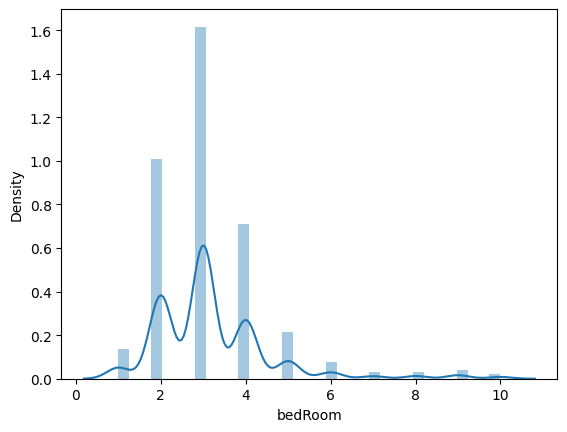

In [44]:
sns.distplot(df['bedRoom'])

<AxesSubplot:xlabel='bedRoom'>

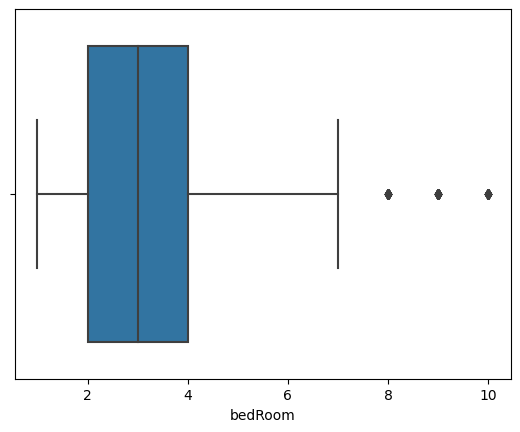

In [45]:
sns.boxplot(x=df['bedRoom'])

In [46]:
df['bedRoom'].describe()

count    3588.000000
mean        3.200390
std         1.391852
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='bathroom', ylabel='Density'>

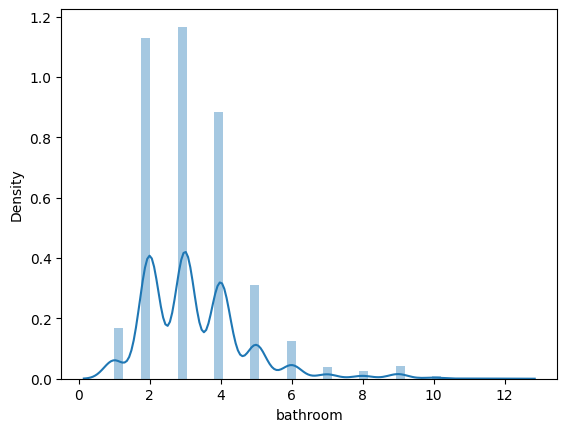

In [47]:
sns.distplot(df['bathroom'])

<AxesSubplot:xlabel='bathroom'>

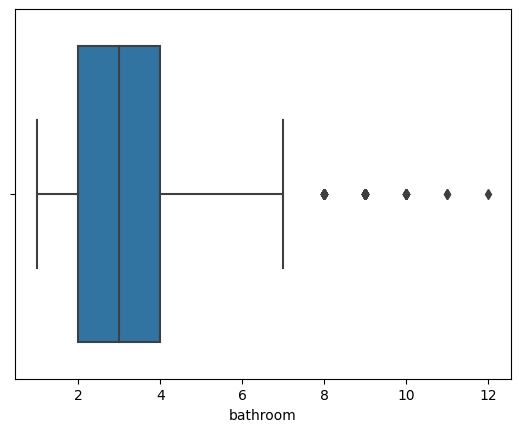

In [48]:
sns.boxplot(x=df['bathroom'])

In [49]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
3232,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,146.0
203,house,NaN,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,0.0,0.0,0.0,0.0,0.0,8.0,2.0,39.0
2082,house,NaN,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,0.0,0.0,18.0,1.0,38.0


In [50]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2.0,2.0,3,5.0,West,Under Construction,1245.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
1,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4.0,5.0,3+,22.0,West,Relatively New,2905.0,NaN,2495.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,174.0
3,flat,sare crescent parc,sector 92,0.87,4971.0,1750.0,Super Built up area 1750(162.58 sq.m.),4.0,4.0,2,2.0,East,Moderately Old,1750.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,4.0,1.0,115.0
4,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,4.0,3+,5.0,North-East,Relatively New,2690.0,2350.0,2170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0
5,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,10529.0,1852.0,Super Built up area 1852(172.06 sq.m.),3.0,3.0,3,10.0,North-East,Relatively New,1852.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


### super built up area

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='super_built_up_area', ylabel='Density'>

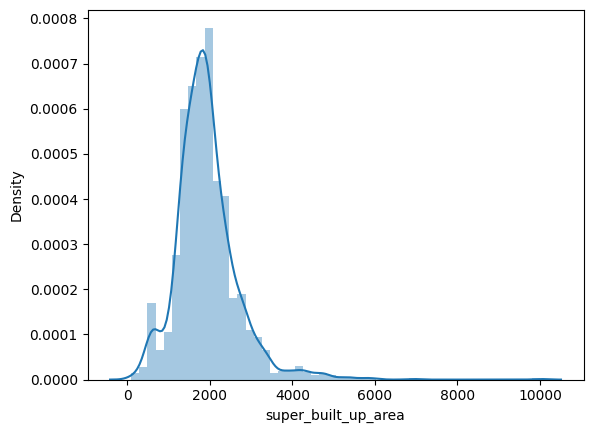

In [51]:
sns.distplot(df['super_built_up_area'])

<AxesSubplot:xlabel='super_built_up_area'>

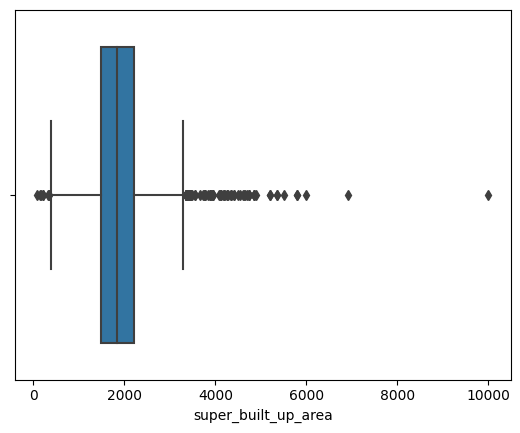

In [52]:
sns.boxplot(x=df['super_built_up_area'])

In [53]:
df['super_built_up_area'].describe()

count     1870.000000
mean      1926.276765
std        764.798542
min         89.000000
25%       1480.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [54]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
844,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
1213,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,4.0,2.0,140.0


### built up area

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='built_up_area', ylabel='Density'>

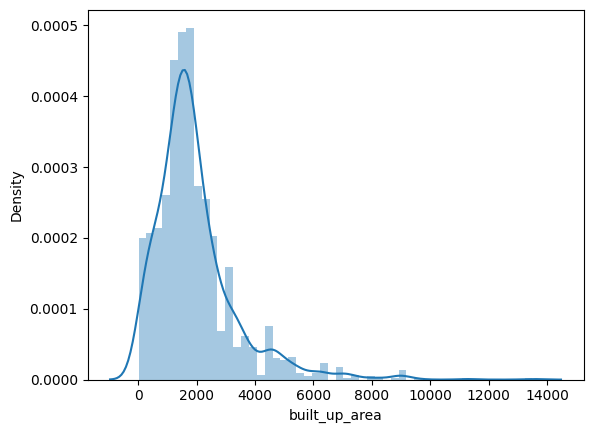

In [55]:
sns.distplot(df['built_up_area'])

<AxesSubplot:xlabel='built_up_area'>

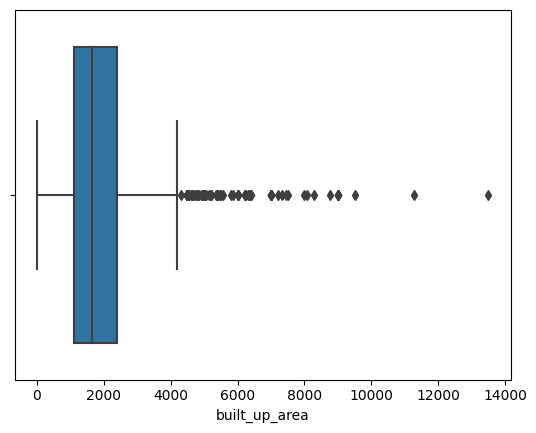

In [56]:
sns.boxplot(x=df['built_up_area'])

In [57]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
1607,house,NaN,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,0.0,0.0,0.0,0.0,0.0,10.0,2.0,42.0
1827,house,NaN,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### carpet area

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='carpet_area', ylabel='Density'>

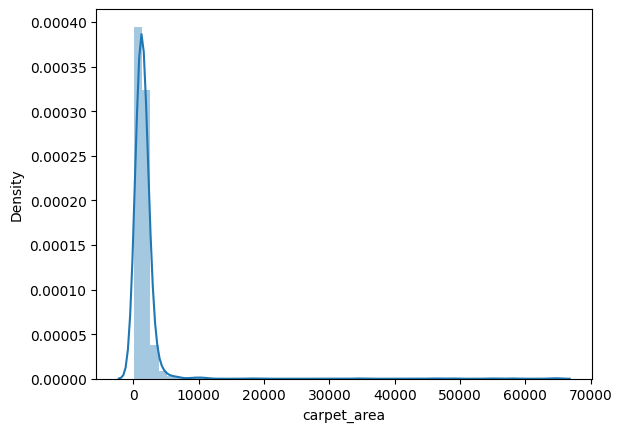

In [58]:
sns.distplot(df['carpet_area'])

<AxesSubplot:xlabel='carpet_area'>

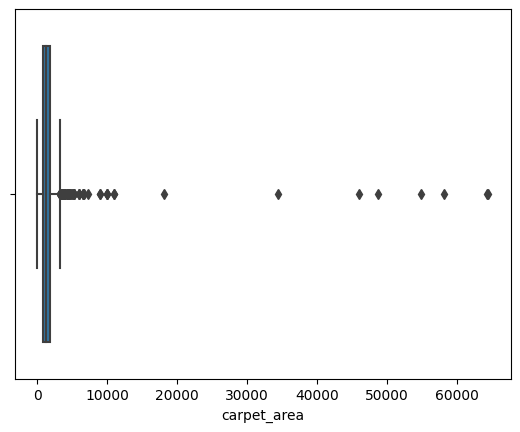

In [59]:
sns.boxplot(x=df['carpet_area'])

In [60]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
151,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
187,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
467,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,44.0
1219,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
1307,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
1382,house,NaN,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,60.0
1453,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2035,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
2282,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2675,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [61]:
df.loc[2131,'carpet_area'] = 1812

In [62]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
151,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
187,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
467,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,44.0
1219,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
1307,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
1382,house,NaN,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,60.0
1453,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2035,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
2282,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2675,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [63]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2.0,2.0,3,5.0,West,Under Construction,1245.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
1,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4.0,5.0,3+,22.0,West,Relatively New,2905.0,NaN,2495.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,174.0
3,flat,sare crescent parc,sector 92,0.87,4971.0,1750.0,Super Built up area 1750(162.58 sq.m.),4.0,4.0,2,2.0,East,Moderately Old,1750.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,4.0,1.0,115.0
4,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,4.0,3+,5.0,North-East,Relatively New,2690.0,2350.0,2170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0
5,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,10529.0,1852.0,Super Built up area 1852(172.06 sq.m.),3.0,3.0,3,10.0,North-East,Relatively New,1852.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='luxury_score', ylabel='Density'>

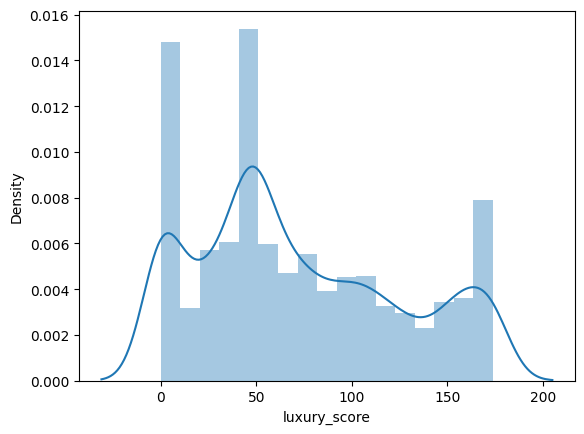

In [64]:
sns.distplot(df['luxury_score'])

<AxesSubplot:>

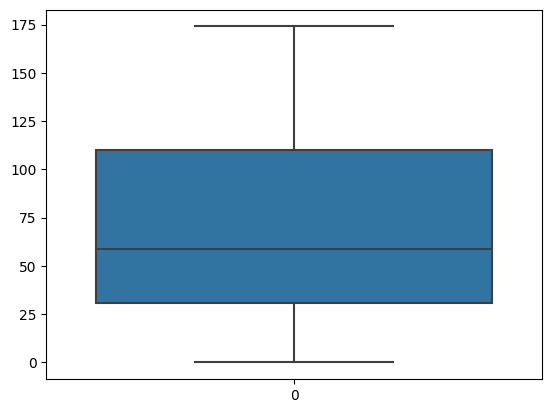

In [65]:
sns.boxplot(df['luxury_score'])

In [66]:
df.shape

(3588, 24)

In [67]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [68]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,flat,pareena mi casa,sector 68,0.92,7390.0,1245.0,Super Built up area 1245(115.66 sq.m.),2.0,2.0,3,5.0,West,Under Construction,1245.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
1,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4.0,5.0,3+,22.0,West,Relatively New,2905.0,NaN,2495.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,174.0
3,flat,sare crescent parc,sector 92,0.87,4971.0,1750.0,Super Built up area 1750(162.58 sq.m.),4.0,4.0,2,2.0,East,Moderately Old,1750.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,4.0,1.0,115.0
4,flat,la vida by tata housing,sector 113,2.78,10335.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,4.0,3+,5.0,North-East,Relatively New,2690.0,2350.0,2170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0
5,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,10529.0,1852.0,Super Built up area 1852(172.06 sq.m.),3.0,3.0,3,10.0,North-East,Relatively New,1852.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

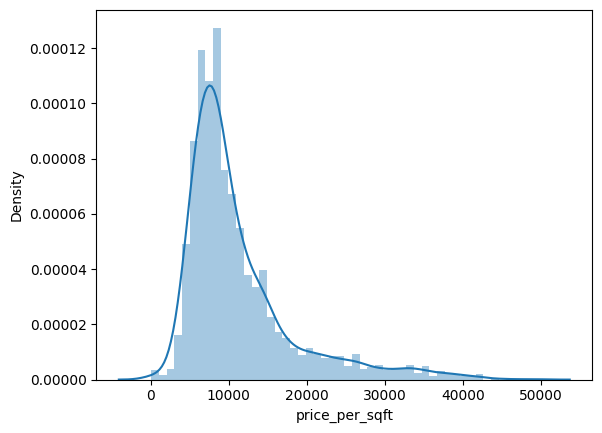

In [69]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:>

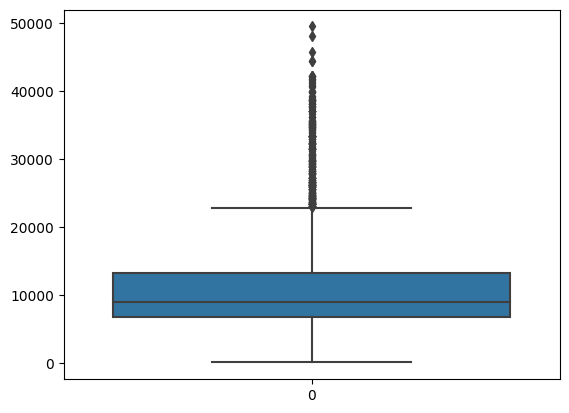

In [70]:
sns.boxplot(df['price_per_sqft'])

In [71]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
541,house,NaN,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,0.0,0.0,0.0,0.0,5.0,1.0,97.0
954,house,NaN,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
973,house,NaN,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1274,house,NaN,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,2.0,60.0
1808,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,0.0,0.0,8.0,2.0,7.0
2137,house,NaN,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,44.0
2581,house,NaN,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,103.0
3087,house,NaN,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,88.0
3199,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0,2.0,121.0


In [72]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

192.67199999999997

In [73]:
df[(df['area']/df['bedRoom'])<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
588,house,NaN,sector 4,0.60,11696.0,513.0,Plot area 57(5.3 sq.m.),3.0,3.0,1,2.0,NaN,Old Property,NaN,57.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1910,flat,rof ananda,sector 95,0.55,8527.0,645.0,Super Built up area 1000(92.9 sq.m.)Carpet are...,3.0,2.0,2,14.0,East,New Property,1000.0,NaN,645.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,81.0
2411,house,NaN,sector 10a,3.60,19608.0,1836.0,Plot area 204(170.57 sq.m.),8.0,4.0,3,3.0,North,Moderately Old,NaN,1836.0,NaN,0.0,0.0,0.0,0.0,0.0,5.0,2.0,28.0
2013,house,NaN,sector 7,0.90,10000.0,900.0,Plot area 100(83.61 sq.m.),6.0,4.0,3,3.0,North-East,Old Property,NaN,900.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,2.0,44.0
1224,flat,signature global solera,sector 107,0.28,5833.0,480.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,11.0,South,Relatively New,NaN,NaN,489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0


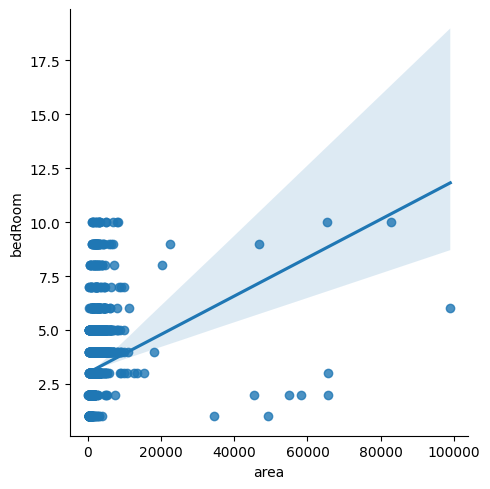

In [74]:
sns.lmplot(data =df,x='area', y= 'bedRoom')

In [75]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [76]:
(df[df['area_room_ratio']<250])['bedRoom'].value_counts()

2.0     47
3.0     33
5.0     28
4.0     17
6.0     17
9.0     14
8.0     12
7.0      8
10.0     7
Name: bedRoom, dtype: int64

In [77]:
df = df[df['area_room_ratio']>100]

In [78]:
df.shape

(3568, 25)

In [79]:
outlier_df = df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

In [80]:
outlier_df.shape

(84, 25)

In [81]:
outlier_df['bedRoom'] =round(outlier_df['bedRoom']/outlier_df['floorNum'])

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
df.update(outlier_df)

In [83]:
df.shape

(3568, 25)

In [84]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [85]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)].shape

(12, 25)

In [86]:
df['society'].fillna('independent', inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 0 to 3802
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3568 non-null   object 
 1   society              3568 non-null   object 
 2   sector               3568 non-null   object 
 3   price                3568 non-null   float64
 4   price_per_sqft       3568 non-null   float64
 5   area                 3568 non-null   float64
 6   areaWithType         3568 non-null   object 
 7   bedRoom              3568 non-null   float64
 8   bathroom             3568 non-null   float64
 9   balcony              3568 non-null   object 
 10  floorNum             3551 non-null   float64
 11  facing               2552 non-null   object 
 12  agePossession        3568 non-null   object 
 13  super_built_up_area  1870 non-null   float64
 14  built_up_area        1594 non-null   float64
 15  carpet_area          1851 non-null   f

In [88]:
df = df[~((df['area_room_ratio']<250) & (df['bedRoom']>4))]

In [89]:
df.shape

(3556, 25)

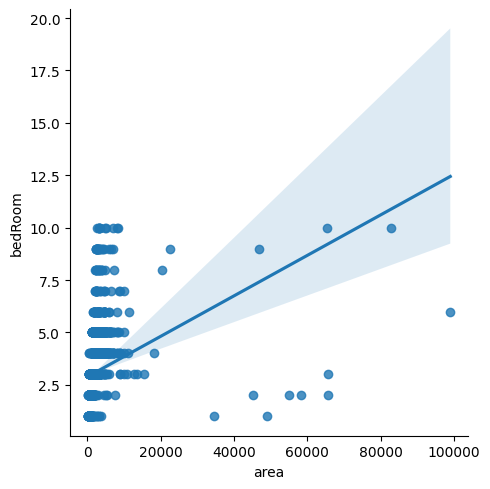

In [90]:
sns.lmplot(data =df,x='area', y= 'bedRoom')

In [91]:
df.drop('Wardrobe', axis=1, inplace=True)

In [92]:
df.shape

(3556, 24)

In [93]:
df.to_csv('../Data/final_dataset_v3.csv',index = False)